In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x_train = np.random.rand(100, 1)
y_train = x_train * 10 + 3 + np.random.randn(100, 1) * 0.33

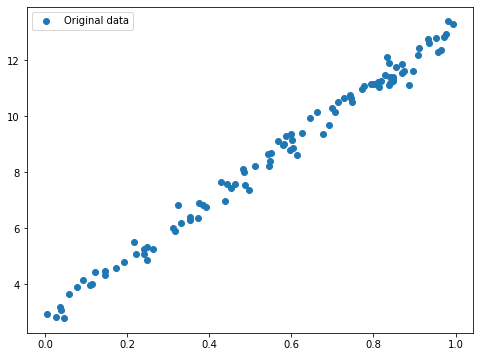

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Original data')
plt.legend()
plt.show();

In [33]:
import torch

In [34]:
X_train = torch.from_numpy(x_train).float()
Y_train = torch.from_numpy(y_train).float()
print(f'Requires_grad_X: {X_train.requires_grad}')
print(f'Requires_grad_Y: {Y_train.requires_grad}')

Requires_grad_X: False
Requires_grad_Y: False


In [35]:
INPUT = 1
OUTPUT = 1
HIDDEN = 1
LEARNING_RATE = 0.001

In [36]:
w1 = torch.rand(INPUT, HIDDEN, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [37]:
b1 = torch.rand(HIDDEN, requires_grad=True)
b1.shape

torch.Size([1])

In [38]:
w1, b1

(tensor([[0.4657]], requires_grad=True), tensor([0.5791], requires_grad=True))

In [39]:
EPOCHS = 4000
for epoch in range(1, EPOCHS + 1):
    y_pred = X_train.mm(w1).add(b1)
    loss = (y_pred - Y_train).pow(2).sum()
    if epoch % 100 == 0:
        print(f'epoch: {epoch}, loss: {loss.item()}')
    loss.backward()
    with torch.no_grad():
        w1 -= LEARNING_RATE * w1.grad
        b1 -= LEARNING_RATE * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

epoch: 100, loss: 35.98337936401367
epoch: 200, loss: 10.506240844726562
epoch: 300, loss: 8.395729064941406
epoch: 400, loss: 8.220891952514648
epoch: 500, loss: 8.20640754699707
epoch: 600, loss: 8.205208778381348
epoch: 700, loss: 8.205106735229492
epoch: 800, loss: 8.20510196685791
epoch: 900, loss: 8.205100059509277
epoch: 1000, loss: 8.205101013183594
epoch: 1100, loss: 8.205101013183594
epoch: 1200, loss: 8.205101013183594
epoch: 1300, loss: 8.205101013183594
epoch: 1400, loss: 8.205101013183594
epoch: 1500, loss: 8.205101013183594
epoch: 1600, loss: 8.205101013183594
epoch: 1700, loss: 8.205101013183594
epoch: 1800, loss: 8.205101013183594
epoch: 1900, loss: 8.205101013183594
epoch: 2000, loss: 8.205101013183594
epoch: 2100, loss: 8.205101013183594
epoch: 2200, loss: 8.205101013183594
epoch: 2300, loss: 8.205101013183594
epoch: 2400, loss: 8.205101013183594
epoch: 2500, loss: 8.205101013183594
epoch: 2600, loss: 8.205101013183594
epoch: 2700, loss: 8.205101013183594
epoch: 2800

In [40]:
w1, b1

(tensor([[10.2910]], requires_grad=True), tensor([2.8484], requires_grad=True))

In [41]:
y_pred = X_train.mm(w1).add(b1)
y_pred

tensor([[ 7.2596],
        [11.4745],
        [11.0202],
        [12.2234],
        [10.3452],
        [ 8.5188],
        [11.8006],
        [11.5049],
        [ 4.8376],
        [10.8059],
        [13.0781],
        [ 3.9615],
        [ 2.9018],
        [ 5.0649],
        [ 6.2470],
        [ 7.8284],
        [12.7786],
        [12.9123],
        [12.2036],
        [10.5493],
        [ 8.4367],
        [12.7029],
        [11.2172],
        [11.2659],
        [11.7962],
        [12.6452],
        [ 5.4003],
        [11.1892],
        [ 4.6206],
        [ 6.8009],
        [10.8482],
        [11.3671],
        [ 9.0724],
        [ 6.1924],
        [ 3.1182],
        [ 9.9739],
        [11.5081],
        [ 3.2424],
        [ 3.3276],
        [ 5.3314],
        [ 9.1704],
        [ 6.1099],
        [ 7.8083],
        [ 6.4923],
        [12.4740],
        [ 6.7008],
        [12.8496],
        [ 4.1042],
        [10.1837],
        [ 8.6953],
        [ 9.0013],
        [ 5.5552],
        [ 3.

In [42]:
y_pred = y_pred.detach().numpy()

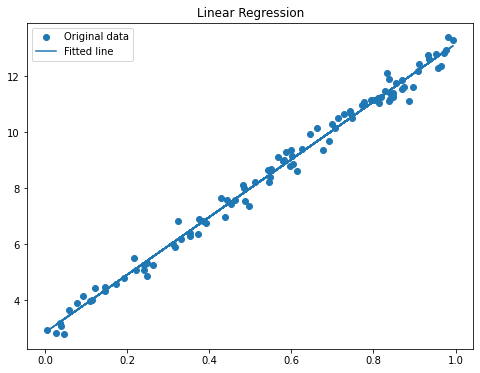

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.title('Linear Regression')
plt.legend()
plt.show();

In [44]:
# Ridge Regression
w1 = torch.rand(INPUT, HIDDEN, requires_grad=True)
b1 = torch.rand(HIDDEN, requires_grad=True)
EPOCHS = 1000
ALPHA = 0.8
for epoch in range(1, EPOCHS + 1):
    y_pred = X_train.mm(w1).add(b1)
    loss = (y_pred - Y_train).pow(2).sum() + ALPHA * w1.pow(2).sum()
    if epoch % 100 == 0:
        print(f'epoch: {epoch}, loss: {loss.item()}')
    loss.backward()
    with torch.no_grad():
        w1 -= LEARNING_RATE * w1.grad
        b1 -= LEARNING_RATE * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

epoch: 100, loss: 101.63267517089844
epoch: 200, loss: 86.50574493408203
epoch: 300, loss: 85.51852416992188
epoch: 400, loss: 85.45408630371094
epoch: 500, loss: 85.44989013671875
epoch: 600, loss: 85.44961547851562
epoch: 700, loss: 85.44960021972656
epoch: 800, loss: 85.44959259033203
epoch: 900, loss: 85.44959259033203
epoch: 1000, loss: 85.44959259033203


In [45]:
w1, b1

(tensor([[9.3825]], requires_grad=True), tensor([3.3577], requires_grad=True))

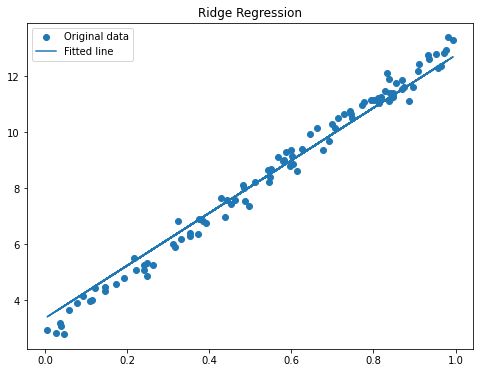

In [46]:
y_pred = X_train.mm(w1).add(b1)
y_pred = y_pred.detach().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.title('Ridge Regression')
plt.legend()
plt.show();